
##Extraction of data
We start off by getting the data from the official github urls present for fashion mnist data sets.

4 files are downloaded in zipped format (.gz) (2 for image data (test and train), 2 for label data(test and train))

This data is stored in a directory on google drive 'mnist_fashion'

In [1]:
import os
import urllib.request
import tempfile
##URLs for the datafiles of label and image test and train data
url_list = ['https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-images-idx3-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-labels-idx1-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-labels-idx1-ubyte.gz?raw=true']
filenames = ['test_images.gz','test_label.gz', 'train_images.gz', 'train_label.gz'] #downloaded file names
DATA_ROOT = 'mnist_fashion'  # Create a temporary directory.
os.mkdir(DATA_ROOT) #new directory to save the data
for i,j in zip(url_list,filenames):
  _data_url = i
  _data_filepath = os.path.join(DATA_ROOT, j)
  urllib.request.urlretrieve(_data_url, _data_filepath) #saving of files

## Unzip files and Image normalization

Files are unzipped using gzip command and are further saved in a pandas dataframe.

In the next step the pixels data of the image files are further normalized by dividing it by 255.

The normalized pixel data and the target label are then merged together in a single dataframe to form the respective test and train dataframes. 

Later these two datarames are converted into csv files and are saved onto the google drive

In [2]:
import gzip
import numpy as np
import pandas as pd 
##opening of image files and normalizing the image files and saving in dataframe
file = gzip.open('/content/mnist_fashion/train_images.gz',"r")

train_images = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(60000,784))
df_trainimages = train_images/255

file = gzip.open('/content/mnist_fashion/test_images.gz',"r")

test_images = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(10000,784))
df_testimages = test_images/255
##opening of labelfiles and saving as dataframes
file = gzip.open('/content/mnist_fashion/train_label.gz',"r")
train_label = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=8))
train_label.columns = ['label']

file = gzip.open('/content/mnist_fashion/test_label.gz',"r")
test_label = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=8))
test_label.columns = ['label']

In [3]:
#joining train images and its labels
df_train = pd.concat([df_trainimages, train_label],axis=1, join='inner')

In [4]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0


In [5]:
#joining images and label data and forming a common dataframes 
df_test = pd.concat([df_testimages, test_label],axis=1, join='inner')

In [6]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,8
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1


In [7]:
import os
os.mkdir('train')
os.mkdir('test')
df_train.to_csv('train/train_data.csv', index = False)
df_test.to_csv('test/test_data.csv', index = False)

## Install TFX and other libraries

In [8]:
!pip install -U tfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 
     |████████████████████████████████| 23.6 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 3.7 MB/s 
     |████████████████████████████████| 1.3 MB 37.6 MB/s 
     |████████████████████████████████| 147 kB 74.6 MB/s 
     |████████████████████████████████| 135 kB 67.4 MB/s 
     |████████████████████████████████| 6.6 MB 21.3 MB/s 
     |████████████████████████████████| 1.9 MB 56.5 MB/s 
     |████████████████████████████████| 435 kB 59.6 MB/s 
     |████████████████████████████████| 1.7 MB 45.3 MB/s 
     |████████████████████████████████| 10.3 MB 46.1 MB/s 
     |████████████████████████████████| 1.8 MB 39.7 MB/s 
     |████████████████████████████████| 206 kB 56.1 MB/s 
     |████████████████████████████████| 1.4 MB 36.4 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |█████████████████████████████

In [1]:
#Imports for the further process
import os
import pprint
import tempfile
import urllib
import absl
import tensorflow as tf
import tensorflow_model_analysis as tfma
tf.get_logger().propagate = False
pp = pprint.PrettyPrinter()
from tfx import v1 as tfx

%load_ext tfx.orchestration.experimental.interactive.notebook_extensions.skip

In [2]:
from tfx.components import Evaluator
from tfx.components import ExampleValidator
from tfx.components import ImportExampleGen
from tfx.components import Pusher
from tfx.components import SchemaGen
from tfx.components import StatisticsGen
from tfx.components import Trainer
from tfx.components import Transform
from tfx.orchestration import metadata
from tfx.orchestration import pipeline
from tfx.orchestration.beam.beam_dag_runner import BeamDagRunner
from tfx.proto import pusher_pb2
from tfx.proto import trainer_pb2
from tfx.components import CsvExampleGen
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

In [3]:
# This is the path where your model will be pushed for serving at the end of the pipeline.
_serving_model_dir = os.path.join(
    tempfile.mkdtemp(), 'serving_model/mnist-fashion') #serving directory for the end

# Set up logging of the data
absl.logging.set_verbosity(absl.logging.INFO)

##ExampleGen

This is the first step of pipeline formation here the data is ingested into the pipeline. Here is where we first fetch the train csv files.

Here, in the background the the data is self splitted in the ratio 2:1 in train set and evaluation set.

Over here we use CsvExampleGen since the data is in CSV format. It takes the directory where the data is present for it to ingest as an input in our case the data was present in '/train' directory

In [5]:
data_dir = 'train/' #data directory where the train data is saved in csv format
context = InteractiveContext() #interactive way to see a component in a pipeline

In [8]:
example_gen = CsvExampleGen(input_base=data_dir) #running examplegen
context.run(example_gen) #shows execution and the result artifacts

INFO:absl:Running driver for CsvExampleGen
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:select span and version = (0, None)
INFO:absl:latest span and version = (0, None)
INFO:absl:Running executor for CsvExampleGen
INFO:absl:Generating examples.


INFO:absl:Processing input csv data train/* to TFExample.


RuntimeError: ignored

##StatisticsGen

Statistics gen is the second step in the pipeline, it takes the output of ExampleGen and gives the statistical insights about the features (eg. max value, min value, median etc.)  which further helps us understand the data better.

It is highly relevent in the production environment as it produces insights about the realtime data.

In [ ]:
statistics_gen = StatisticsGen(examples=example_gen.outputs['examples']) #running statistic gen
context.run(statistics_gen)

In [ ]:
context.show(statistics_gen.outputs['statistics']) #context shows interactive statistics of the data

##SchemaGen

This is the third step in our pipeline, it takes the output of the statistics gen  and gives us information about the schema of the data. The schema of the data is stored in the file 'schema.pbtxt' in the SchemaGen section of the pipeline

It contains information like feature data type, feature name, presence etc.

In [ ]:
schema_gen = SchemaGen(statistics=statistics_gen.outputs['statistics']) #running schema gen
context.run(schema_gen)

In [ ]:
context.show(schema_gen.outputs['schema']) #schema artifact dispayed

## ExampleValidator

In [ ]:
example_validator = ExampleValidator(statistics=statistics_gen.outputs['statistics'],
                                     schema=schema_gen.outputs['schema']) #running example validator

In [ ]:
context.run(example_validator) #context and anomalies as artifact

## Trainer

It is the core module of the pipeline. It is responsible for training of the tensorflow model.

Firstly we create the trainer module which contains of 3 different functions.

1. Input fuction: it defines the features and labels required for the training part. We feed the tfrecord file, schema from schema generator, batch size

2. Model: Here we define the tensorflow model for training

3. Training the model: In this part we train the model with the arguments provided and further save the model and its values.

After creating the trainer module we feed it to the 'Trainer' of the pipeline which is fed with trainer module, example generator's output and 



In [ ]:
_trainer_module_file = 'module1.py'

In [ ]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils
from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

_FEATURE_KEYS = [str(feat) for feat in range(0,784)]
 
_LABEL_KEY = 'label'

_TRAIN_BATCH_SIZE = 30
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()

import tensorflow
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model():
  inputs = [Input(shape=(1,), name =f) for f in _FEATURE_KEYS]
  all_input = Concatenate()(inputs)
  dense1 = Dense(256, activation='relu')(all_input)
  dense2 = Dense(128, activation = 'relu')(dense1)
  dense3 = Dense(10, activation='relu')(dense2)
  model = Model(inputs=inputs, outputs=dense3)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = build_model()
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps, epochs = 10)

  model.save(fn_args.serving_model_dir, save_format='tf') #save the model

In [ ]:
trainer = tfx.components.Trainer(module_file= _trainer_module_file,
                                 examples=example_gen.outputs['examples'],
                                 train_args=tfx.proto.TrainArgs(num_steps=100),
                                 eval_args=tfx.proto.EvalArgs(num_steps=5)) #trainer defination

In [ ]:
context.run(trainer) #context of data

Streaming output truncated to the last 5000 lines.
INFO:absl:Feature 387 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 388 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 389 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 39 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 390 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 391 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 392 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 393 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 394 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 395 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 396 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 397 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feat

Epoch 1/10
100/100 [==============================] - 7s 49ms/step - loss: 1.3570 - accuracy: 0.5297 - val_loss: 0.9254 - val_accuracy: 0.6800
Epoch 2/10
100/100 [==============================] - 5s 49ms/step - loss: 0.8636 - accuracy: 0.6860 - val_loss: 1.0286 - val_accuracy: 0.5600
Epoch 3/10
100/100 [==============================] - 5s 48ms/step - loss: 0.8028 - accuracy: 0.7057 - val_loss: 0.9022 - val_accuracy: 0.7600
Epoch 4/10
100/100 [==============================] - 5s 49ms/step - loss: 0.7681 - accuracy: 0.7260 - val_loss: 0.7565 - val_accuracy: 0.6400
Epoch 5/10
100/100 [==============================] - 5s 49ms/step - loss: 0.7531 - accuracy: 0.7277 - val_loss: 0.7726 - val_accuracy: 0.6600
Epoch 6/10
100/100 [==============================] - 5s 48ms/step - loss: 0.6978 - accuracy: 0.7337 - val_loss: 0.5750 - val_accuracy: 0.7800
Epoch 7/10
100/100 [==============================] - 4s 44ms/step - loss: 0.6863 - accuracy: 0.7463 - val_loss: 0.5638 - val_accuracy: 0.7800

INFO:tensorflow:Assets written to: /tmp/tfx-interactive-2022-06-12T18_24_55.188302-4dirj3nc/Trainer/model/5/Format-Serving/assets


INFO:absl:Training complete. Model written to /tmp/tfx-interactive-2022-06-12T18_24_55.188302-4dirj3nc/Trainer/model/5/Format-Serving. ModelRun written to /tmp/tfx-interactive-2022-06-12T18_24_55.188302-4dirj3nc/Trainer/model_run/5
INFO:absl:Running publisher for Trainer
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: Trainer
    execution_id: 5
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Trainer, output_key=model, additional_properties={}, additional_custom_properties={})
        model_run: OutputChannel(artifact_type=ModelRun, producer_component_id=Trainer, output_key=model_run, additional_properties={}, additional_custom_properties={}))

## Pusher

This is the last part of our tfx pipeline it pipeline. It takes the output of the trainer (i.e. the trained model) as its input in our pipeline and pushes the model in the base_directory from where different APIs can be used to access the model.

In [ ]:
#pushing the data to final directory mentioned in beginning
pusher = tfx.components.Pusher(model=trainer.outputs['model'],
                               push_destination=tfx.proto.PushDestination(
                                   filesystem=tfx.proto.PushDestination.Filesystem(
                                       base_directory=_serving_model_dir)))

context.run(pusher) #running the context

INFO:absl:Running driver for Pusher
INFO:absl:MetadataStore with DB connection initialized


AlreadyExistsError: ignored

In [ ]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  18279      0 --:--:-- --:--:-- --:--:-- 18279
OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://storage.googleapis.com/tensorflow-serving-apt testing InRelease [162 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/

In [ ]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 87 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt testing/tensorflow-model-server-2.8.0 amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 5s (70.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


In [ ]:
MODEL_DIR = '/tmp/tmptomu0d3o/serving_model/'

Traceback (most recent call last):
  File "/usr/local/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 1260, in main
    args.func(args)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 734, in show
    _show_all(args.dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 302, in _show_all
    tag_sets = saved_model_utils.get_saved_model_tag_sets(saved_model_dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_utils.py", line 87, in get_saved_model_tag_sets
    saved_model = read_saved_model(saved_model_dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_utils.py", line 51, in read_saved_model
    raise IOError("SavedModel file does not exist at: %s" % saved_model_dir)
OSError: SavedModel file does not exist at: /

## Automated Pipeline

After individually inspecting all the parts of our pipeline carefully. Now, we try to automate our pipeline

In [ ]:
final_pipeline = 'pipeline.py'

In [ ]:
%%writefile {final_pipeline}
from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils

from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

_FEATURE_KEYS = [str(feat) for feat in range(0,784)] #pixel features of the data
 
_LABEL_KEY = 'label' #label of the data

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()

import tensorflow
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model():
  inputs = [Input(shape=(1,), name =f) for f in _FEATURE_KEYS]
  all_input = Concatenate()(inputs)
  dense1 = Dense(128, activation='relu')(all_input)
  dense2 = Dense(10, activation='relu')(dense1)
  model = Model(inputs=inputs, outputs=dense2)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC) #features of the schema

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE) #train dataset with schema, accessor and batchsize
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE) #eval dataset with schema, accessor and batchsize

  model = build_model() #building the model
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps, epochs = 5) #fit model on the data

  model.save(fn_args.serving_model_dir, save_format='tf') #saves the model in the directory

Writing pipeline.py


In [ ]:
def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
  #Initializes data pipeline by ingesting data.
  example_gen = tfx.components.CsvExampleGen(input_base=data_root)

  #creates feature statistics
  statistics_gen = StatisticsGen(examples=example_gen.outputs['examples'])

  #creates schema
  schema_gen = SchemaGen(statistics=statistics_gen.outputs['statistics'])

  #trains a model.
  trainer = tfx.components.Trainer(module_file=module_file,
                                   examples=example_gen.outputs['examples'],
                                   train_args=tfx.proto.TrainArgs(num_steps=100),
                                   eval_args=tfx.proto.EvalArgs(num_steps=5))

  #Pushes the model to the directory
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))

  #Following three components will be included in the pipeline.
  components = [example_gen, statistics_gen, schema_gen, trainer, pusher]

  return tfx.dsl.Pipeline(pipeline_name=pipeline_name,
                          pipeline_root=pipeline_root,
                          metadata_connection_config=tfx.orchestration.metadata
                          .sqlite_metadata_connection_config(metadata_path),
                          components=components) #return the pipelines and its different components like metadata 

In [ ]:
absl.logging.set_verbosity(absl.logging.INFO)
pipeline_name='mnist_pipeline'
PIPELINE_ROOT = os.path.join('pipelines', pipeline_name)
SERVING_MODEL_DIR = os.path.join('serving_model',pipeline_name)
METADATA_PATH = os.path.join('metadata', pipeline_name, 'metadata.db')
tfx.orchestration.LocalDagRunner().run(
_create_pipeline(
    pipeline_name='mnist_fashion',
    pipeline_root=PIPELINE_ROOT,
    data_root=data_dir,
    module_file=final_pipeline,
    serving_model_dir=SERVING_MODEL_DIR,
    metadata_path=METADATA_PATH))

INFO:absl:Excluding no splits because exclude_splits is not set.
INFO:absl:Excluding no splits because exclude_splits is not set.
INFO:absl:Generating ephemeral wheel package for '/content/pipeline.py' (including modules: ['pipeline']).
INFO:absl:User module package has hash fingerprint version 61272cfc02d28a59982720d7c992315c3fe08c85f14eb42585487c018a989113.
INFO:absl:Executing: ['/usr/bin/python3', '/tmp/tmp03sh9z0z/_tfx_generated_setup.py', 'bdist_wheel', '--bdist-dir', '/tmp/tmpoed_1f5p', '--dist-dir', '/tmp/tmpsb9lcdqf']
INFO:absl:Successfully built user code wheel distribution at 'pipelines/mnist_pipeline/_wheels/tfx_user_code_Trainer-0.0+61272cfc02d28a59982720d7c992315c3fe08c85f14eb42585487c018a989113-py3-none-any.whl'; target user module is 'pipeline'.
INFO:absl:Full user module path is 'pipeline@pipelines/mnist_pipeline/_wheels/tfx_user_code_Trainer-0.0+61272cfc02d28a59982720d7c992315c3fe08c85f14eb42585487c018a989113-py3-none-any.whl'
INFO:absl:Using deployment config:
 execut

Streaming output truncated to the last 5000 lines.
INFO:absl:Feature 387 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 388 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 389 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 39 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 390 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 391 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 392 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 393 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 394 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 395 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 396 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 397 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feat

Epoch 1/5
100/100 [==============================] - 9s 65ms/step - loss: 1.9416 - accuracy: 0.3375 - val_loss: 1.8174 - val_accuracy: 0.4200
Epoch 2/5
100/100 [==============================] - 5s 47ms/step - loss: 1.7654 - accuracy: 0.4130 - val_loss: 1.6777 - val_accuracy: 0.4200
Epoch 3/5
100/100 [==============================] - 5s 52ms/step - loss: 1.5375 - accuracy: 0.5090 - val_loss: 1.6259 - val_accuracy: 0.4400
Epoch 4/5
100/100 [==============================] - 5s 48ms/step - loss: 1.4893 - accuracy: 0.5230 - val_loss: 1.5004 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 5s 52ms/step - loss: 1.4474 - accuracy: 0.5245 - val_loss: 1.4031 - val_accuracy: 0.5400


INFO:tensorflow:Assets written to: pipelines/mnist_pipeline/Trainer/model/3/Format-Serving/assets


INFO:absl:Training complete. Model written to pipelines/mnist_pipeline/Trainer/model/3/Format-Serving. ModelRun written to pipelines/mnist_pipeline/Trainer/model_run/3
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 3 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'model_run': [Artifact(artifact: uri: "pipelines/mnist_pipeline/Trainer/model_run/3"
custom_properties {
  key: "name"
  value {
    string_value: "mnist_fashion:2022-06-12T17:04:10.688957:Trainer:model_run:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.8.0"
  }
}
name: "mnist_fashion:2022-06-12T17:04:10.688957:Trainer:model_run:0"
, artifact_type: name: "ModelRun"
)], 'model': [Artifact(artifact: uri: "pipelines/mnist_pipeline/Trainer/model/3"
custom_properties {
  key: "name"
  value {
    string_value: "mnist_fashion:2022-06-12T17:04:10.688957:Trainer:model:0"
  }
}
custom_properties {
  key: 

In [ ]:
MODEL_DIR = '/content/serving_model/mnist_pipeline/1'

In [ ]:
!saved_model_cli show --dir {MODEL_DIR} --all

Traceback (most recent call last):
  File "/usr/local/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 1260, in main
    args.func(args)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 734, in show
    _show_all(args.dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_cli.py", line 302, in _show_all
    tag_sets = saved_model_utils.get_saved_model_tag_sets(saved_model_dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_utils.py", line 87, in get_saved_model_tag_sets
    saved_model = read_saved_model(saved_model_dir)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/tools/saved_model_utils.py", line 51, in read_saved_model
    raise IOError("SavedModel file does not exist at: %s" % saved_model_dir)
OSError: SavedModel file does not exist at: /

In [ ]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   136k      0 --:--:-- --:--:-- --:--:--  136k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt testing InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [ ]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.8.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


In [ ]:
import os
MODEL_DIR = '/content/serving_model/mnist_pipeline'
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

2022-06-12 15:25:12.392979: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable fashion_model found under base path /content/serving_model/mnist_pipeline/1. Did you forget to name your leaf directory as a number (eg. '/1/')?
2022-06-12 15:25:13.393071: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable fashion_model found under base path /content/serving_model/mnist_pipeline/1. Did you forget to name your leaf directory as a number (eg. '/1/')?
                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [8]:
PIPELINE_NAME = "mnist-fashion"

# Output directory to store artifacts generated from the pipeline.
PIPELINE_ROOT = os.path.join('pipelines', PIPELINE_NAME)
# Path to a SQLite DB file to use as an MLMD storage.
METADATA_PATH = os.path.join('metadata', PIPELINE_NAME, 'metadata.db')
#SCHEMA_DIRECTORY = os.path.join(PIPELINE_ROOT, 'schema')
#SCHEMA_FILE_NAME = str(os.path.join(SCHEMA_DIRECTORY, 'schema.pbtxt'))
#SCHEMA_FILE_NAME = /content/pipelines/mnist-fashion/SchemaGen/schema/3


# Output directory where created models from the pipeline will be exported.

SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)
absl.logging.set_verbosity(absl.logging.INFO)

In [3]:
_trainer_module_file = 'mnist_trainer.py'

In [4]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils

from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2


_FEATURE_KEYS = [str(feat) for feat in range(0,784)]
_LABEL_KEY = "label"

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
 
  
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()


def _build_keras_model() -> tf.keras.Model:
  """Creates a DNN Keras model for classifying penguin data.

  Returns:
    A Keras Model.
  """
  # The model below is built with Functional API, please refer to
  # https://www.tensorflow.org/guide/keras/overview for all API options.
  inputs = [keras.layers.Input(shape=(1,), name=f) for f in _FEATURE_KEYS]
  d = keras.layers.concatenate(inputs)
  for _ in range(4):
    d = keras.layers.Dense(512, activation='relu')(d)
  #d = keras.layers.Dense(512, activation='relu')(d)
  
  outputs = keras.layers.Dense(10)(d)
  #outputs = keras.layers.Dense(10,activation='softmax')(d)
  model = keras.Model(inputs=inputs, outputs=outputs)
  
    
  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[keras.metrics.SparseCategoricalAccuracy()])

  model.summary(print_fn=logging.info)
  return model


# TFX Trainer will call this function.
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.

  #print('tfx.components.FnArgs',tfx.components.FnArgs)
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)
  #print('fn_args.train_files',fn_args.train_files)
  #print('fn_args.data_accessor',fn_args.data_accessor)
  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = _build_keras_model()
  #print('train_dataset',train_dataset)
  #print('fn_args.train_steps',fn_args.train_steps)
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps)

  # The result of the training should be saved in `fn_args.serving_model_dir`
  # directory.
  model.save(fn_args.serving_model_dir, save_format='tf')

Writing mnist_trainer.py


In [6]:
def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
  """Creates a three component penguin pipeline with TFX."""
  # CsvExampleGen brings data into the pipeline from a csv file.
  # the input_base is the source data path.
  example_gen = tfx.components.CsvExampleGen(input_base=data_dir)

  

  # trainer component uses the user-provided Python function (.py module file) that creates and trains a model.
  # it takes the 'examples' from example_gen.
  trainer = tfx.components.Trainer(
      module_file=module_file,
      examples=example_gen.outputs['examples'],
      train_args=tfx.proto.TrainArgs(num_steps=200),
      eval_args=tfx.proto.EvalArgs(num_steps=5))

   # NEW: Get the latest blessed model for Evaluator.
  model_resolver = tfx.dsl.Resolver(
      strategy_class=tfx.dsl.experimental.LatestBlessedModelStrategy,
      model=tfx.dsl.Channel(type=tfx.types.standard_artifacts.Model),
      model_blessing=tfx.dsl.Channel(
          type=tfx.types.standard_artifacts.ModelBlessing)).with_id(
              'latest_blessed_model_resolver')
          
   # NEW: Uses TFMA to compute evaluation statistics over features of a model and
  #   perform quality validation of a candidate model (compared to a baseline).

  eval_config = tfma.EvalConfig(
      model_specs=[tfma.ModelSpec(label_key='label')],
      slicing_specs=[
          # An empty slice spec means the overall slice, i.e. the whole dataset.
          tfma.SlicingSpec(),
          # Calculate metrics for each penguin species.
          tfma.SlicingSpec(feature_keys=['label']),
          ],
      metrics_specs=[
          tfma.MetricsSpec(per_slice_thresholds={
              'sparse_categorical_accuracy':
                  tfma.PerSliceMetricThresholds(thresholds=[
                      tfma.PerSliceMetricThreshold(
                          slicing_specs=[tfma.SlicingSpec()],
                          threshold=tfma.MetricThreshold(
                              value_threshold=tfma.GenericValueThreshold(
                                   lower_bound={'value': 0.6}),
                              # Change threshold will be ignored if there is no
                              # baseline model resolved from MLMD (first run).
                              change_threshold=tfma.GenericChangeThreshold(
                                  direction=tfma.MetricDirection.HIGHER_IS_BETTER,
                                  absolute={'value': -1e-10}))
                       )]),
          })],
      )

   # Uses TFMA to compute the evaluation statistics over features of a model.
  evaluator = tfx.components.Evaluator(
      examples=example_gen.outputs['examples'],
      model=trainer.outputs['model'],
      baseline_model=model_resolver.outputs['model'],
      eval_config=eval_config)

  # Pushes the model to a filesystem destination.
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      model_blessing=evaluator.outputs['blessing'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))

  # The below three components will be included in the pipeline.
  components = [
      example_gen,
      trainer,
      model_resolver,
      evaluator,
      pusher,
  ]

  return tfx.dsl.Pipeline(
      pipeline_name=pipeline_name,
      pipeline_root=pipeline_root,
      metadata_connection_config=tfx.orchestration.metadata
      .sqlite_metadata_connection_config(metadata_path),
      components=components)

In [9]:
tfx.orchestration.LocalDagRunner().run(
  _create_pipeline(
      pipeline_name=PIPELINE_NAME,
      pipeline_root=PIPELINE_ROOT,
      data_root=data_dir,
      module_file=_trainer_module_file,
      serving_model_dir=SERVING_MODEL_DIR,
      metadata_path=METADATA_PATH))

INFO:absl:Generating ephemeral wheel package for '/content/mnist_trainer.py' (including modules: ['mnist_trainer']).
INFO:absl:User module package has hash fingerprint version 76b8b74b476092e9b676a3bf4fdc0e8aed69f1021913a6ffd431b2d9ebcbf6ec.
INFO:absl:Executing: ['/usr/bin/python3', '/tmp/tmp_skkdso1/_tfx_generated_setup.py', 'bdist_wheel', '--bdist-dir', '/tmp/tmp0tausxb3', '--dist-dir', '/tmp/tmp3qa2j8zl']
INFO:absl:Successfully built user code wheel distribution at 'pipelines/mnist-fashion/_wheels/tfx_user_code_Trainer-0.0+76b8b74b476092e9b676a3bf4fdc0e8aed69f1021913a6ffd431b2d9ebcbf6ec-py3-none-any.whl'; target user module is 'mnist_trainer'.
INFO:absl:Full user module path is 'mnist_trainer@pipelines/mnist-fashion/_wheels/tfx_user_code_Trainer-0.0+76b8b74b476092e9b676a3bf4fdc0e8aed69f1021913a6ffd431b2d9ebcbf6ec-py3-none-any.whl'
INFO:absl:Using deployment config:
 executor_specs {
  key: "CsvExampleGen"
  value {
    beam_executable_spec {
      python_executor_spec {
        clas

Streaming output truncated to the last 5000 lines.
INFO:absl:Feature 213 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 214 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 215 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 216 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 217 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 218 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 219 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 22 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 220 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 221 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 222 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feature 223 has a shape dim {
  size: 1
}
. Setting to DenseTensor.
INFO:absl:Feat

200/200 [==============================] - 23s 88ms/step - loss: 0.8259 - sparse_categorical_accuracy: 0.6913 - val_loss: 0.6960 - val_sparse_categorical_accuracy: 0.8000


INFO:tensorflow:Assets written to: pipelines/mnist-fashion/Trainer/model/3/Format-Serving/assets


INFO:absl:Training complete. Model written to pipelines/mnist-fashion/Trainer/model/3/Format-Serving. ModelRun written to pipelines/mnist-fashion/Trainer/model_run/3
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 3 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'model': [Artifact(artifact: uri: "pipelines/mnist-fashion/Trainer/model/3"
custom_properties {
  key: "name"
  value {
    string_value: "mnist-fashion:2022-06-12T19:41:47.195817:Trainer:model:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.8.0"
  }
}
name: "mnist-fashion:2022-06-12T19:41:47.195817:Trainer:model:0"
, artifact_type: name: "Model"
base_type: MODEL
)], 'model_run': [Artifact(artifact: uri: "pipelines/mnist-fashion/Trainer/model_run/3"
custom_properties {
  key: "name"
  value {
    string_value: "mnist-fashion:2022-06-12T19:41:47.195817:Trainer:model_run:0"
  }
}
custom_properties {
 

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


INFO:absl:Blessing result True written to pipelines/mnist-fashion/Evaluator/blessing/4.
INFO:absl:Cleaning up stateless execution info.
INFO:absl:Execution 4 succeeded.
INFO:absl:Cleaning up stateful execution info.
INFO:absl:Publishing output artifacts defaultdict(<class 'list'>, {'blessing': [Artifact(artifact: uri: "pipelines/mnist-fashion/Evaluator/blessing/4"
custom_properties {
  key: "name"
  value {
    string_value: "mnist-fashion:2022-06-12T19:41:47.195817:Evaluator:blessing:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.8.0"
  }
}
name: "mnist-fashion:2022-06-12T19:41:47.195817:Evaluator:blessing:0"
, artifact_type: name: "ModelBlessing"
)], 'evaluation': [Artifact(artifact: uri: "pipelines/mnist-fashion/Evaluator/evaluation/4"
custom_properties {
  key: "name"
  value {
    string_value: "mnist-fashion:2022-06-12T19:41:47.195817:Evaluator:evaluation:0"
  }
}
custom_properties {
  key: "tfx_version"
  value {
    string_value: "1.8.0"
  }
}


In [10]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3

In [11]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 1.8.0 requires grpcio<2,>=1.28.1, but you have grpcio 1.26.0 which is incompatible.
grpcio-status 1.46.3 requires grpcio>=1.46.3, but you have grpcio 1.26.0 which is incompatible.
google-cloud-pubsub 2.13.0 requires grpcio<2.0dev,>=1.38.1, but you have grpcio 1.26.0 which is incompatible.
google-cloud-bigquery 2.34.4 requires grpcio<2.0dev,>=1.38.1, but you have grpcio 1.26.0 which is incompatible.
apache-beam 2.39.0 requires grpcio<2,>=1.29.0, but you have grpcio 1.26.0 which is incompatible.
TensorFlow version: 2.8.2


In [12]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [13]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  70071      0 --:--:-- --:--:-- --:--:-- 70071
OK
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt testing InRelease [162 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ub

In [14]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 87 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt testing/tensorflow-model-server-2.8.0 amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 5s (70.1 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


In [15]:
!saved_model_cli show --dir /content/serving_model/mnist-fashion/1655063984 --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['0'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: serving_default_0:0
    inputs['1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: serving_default_1:0
    inputs['10'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: serving_default_10:0
    inputs['100'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: serving_default_100:0
    inputs['101'] tensor_info:
        dtype: DT_FLOAT

In [16]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_mnist_model \
  --model_base_path="/content/serving_model/mnist-fashion" >server.log 2>&1

In [17]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [18]:
!ps -ef|grep -i tensor

root        2160    2152  0 20:03 ?        00:00:00 tensorflow_model_server --rest_api_port=8501 --model_name=fashion_mnist_model --model_base_path=/content/serving_model/mnist-fashion
root        2200     389  7 20:05 ?        00:00:00 /bin/bash -c ps -ef|grep -i tensor
root        2202    2200  0 20:05 ?        00:00:00 grep -i tensor


In [22]:
def show_image(index, title):
  plt.figure()
  plt.imshow(test_images[index].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

In [23]:
import pandas as pd
test_df = pd.read_csv('/content/test/test_data.csv')

In [41]:
test_images = test_df.loc[0:1].drop(['label'], axis =1)

In [50]:
test_label = test_df.loc[0:1].label

In [51]:
test_label

0    9
1    2
Name: label, dtype: int64

In [42]:
test_images = np.array(test_images)
test_images.shape

(2, 784)

In [47]:
test_list = []
for image in test_images:
  json_dict = dict()
  for index,value in enumerate(image):
      json_dict[(str(index))] = [value]
      test_list.append(json_dict)

In [48]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_list})


In [49]:
import requests
headers = {"content-type": "application/json"}
#json_response = requests.get('http://localhost:8501/v1/models/fashion_mnist_model/metadata')
json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist_model:predict', data=data, headers=headers)
print(json_response.text)

{
    "predictions": [[-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.53889132, -2.35074878, 4.95244884], [-2.95182, -3.74002981, -2.66865659, -2.83298755, -4.16837454, 2.26081896, -2.28877044, 4.538891

In [ ]:
requests.get()

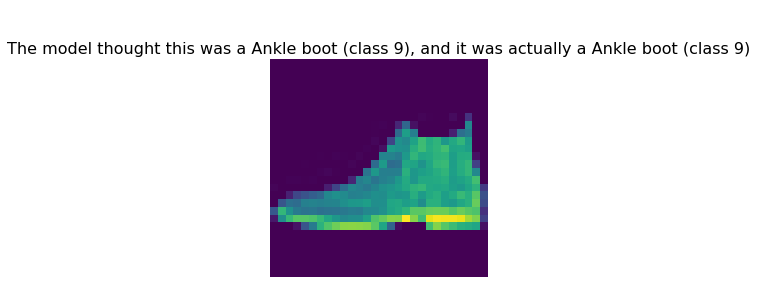

In [52]:
predictions = json.loads(json_response.text)['predictions']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_image(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_label[0]], test_label[0]))

In [34]:
!zip -r /content/file.zip /content/serving_model/mnist-fashion/1655063984

  adding: content/serving_model/mnist-fashion/1655063984/ (stored 0%)
  adding: content/serving_model/mnist-fashion/1655063984/assets/ (stored 0%)
  adding: content/serving_model/mnist-fashion/1655063984/saved_model.pb (deflated 91%)
  adding: content/serving_model/mnist-fashion/1655063984/keras_metadata.pb (deflated 96%)
  adding: content/serving_model/mnist-fashion/1655063984/variables/ (stored 0%)
  adding: content/serving_model/mnist-fashion/1655063984/variables/variables.index (deflated 68%)
  adding: content/serving_model/mnist-fashion/1655063984/variables/variables.data-00000-of-00001 (deflated 8%)
